In [1]:
# import data

import pandas as pd
import matplotlib.pyplot as plt
import thinkplot
import thinkstats2
import numpy as np
import statsmodels.formula.api as smf

df = pd.read_csv('/Users/bryanemer/Downloads/dataset.csv', index_col=0)
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.00000,114000.00000,114000.00000,114000.00000,114000.00000,114000.00000,114000.00000,114000.00000,114000.00000,114000.00000,114000.00000,114000.00000,114000.00000,114000.00000
mean,33.23854,228029.15311,0.56680,0.64138,5.30914,-8.25896,0.63755,0.08465,0.31491,0.15605,0.21355,0.47407,122.14784,3.90404
std,22.30508,107297.71264,0.17354,0.25153,3.55999,5.02934,0.48071,0.10573,0.33252,0.30955,0.19038,0.25926,29.97820,0.43262
min,0.00000,0.00000,0.00000,0.00000,0.00000,-49.53100,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,17.00000,174066.00000,0.45600,0.47200,2.00000,-10.01300,0.00000,0.03590,0.01690,0.00000,0.09800,0.26000,99.21875,4.00000
50%,35.00000,212906.00000,0.58000,0.68500,5.00000,-7.00400,1.00000,0.04890,0.16900,0.00004,0.13200,0.46400,122.01700,4.00000
75%,50.00000,261506.00000,0.69500,0.85400,8.00000,-5.00300,1.00000,0.08450,0.59800,0.04900,0.27300,0.68300,140.07100,4.00000
max,100.00000,5237295.00000,0.98500,1.00000,11.00000,4.53200,1.00000,0.96500,0.99600,1.00000,1.00000,0.99500,243.37200,5.00000


In [2]:
duplicates = df[df.duplicated()]
num_duplicates = duplicates.shape[0]
num_duplicates
df =df.drop_duplicates(subset=['track_id'])

In [3]:
missing_values = df.isnull().sum()
missing_values

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

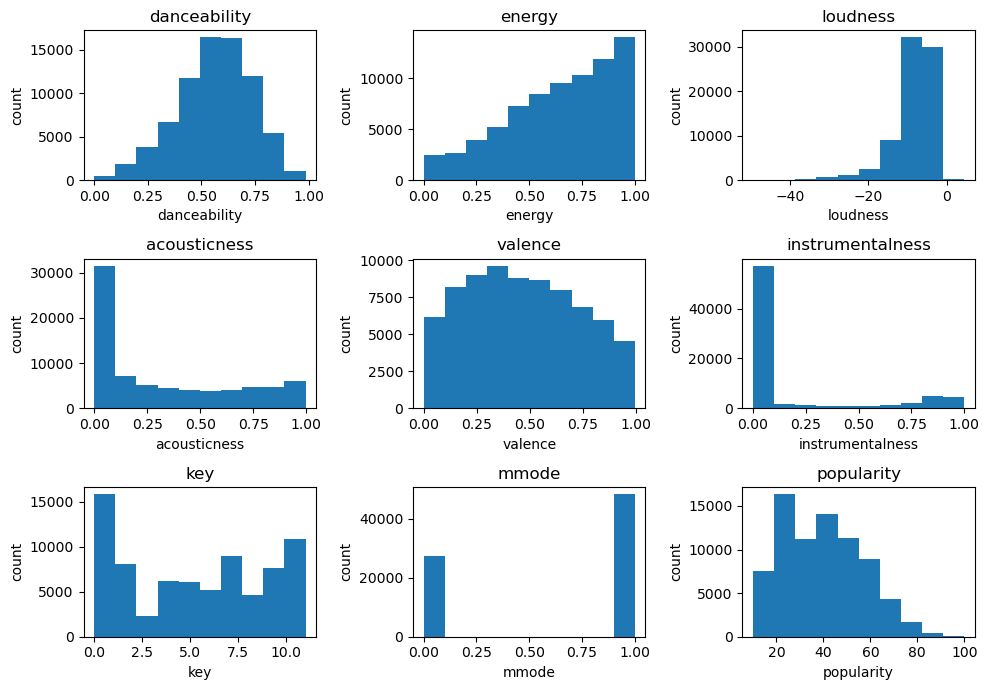

In [4]:
df = df.dropna()
features = ['danceability', 'energy', 'loudness', 'acousticness', 'valence', 'instrumentalness', 'key', 'mmode', 'popularity']
df = df.rename(columns={'mode': 'mmode'}, )
df = df.drop(df[df['popularity'] < 10].index)
plt.figure(figsize=(10, 7))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[feature])
    plt.title(f'{feature}')
    plt.xlabel(feature)
    plt.ylabel('count')
plt.tight_layout()
plt.show()

In [5]:
df.danceability.describe()



count    75875.000000
mean         0.559842
std          0.173756
min          0.000000
25%          0.451000
50%          0.573000
75%          0.687000
max          0.985000
Name: danceability, dtype: float64

In [6]:
df.energy.describe()

count    75875.000000
mean         0.642593
std          0.254161
min          0.000000
25%          0.467000
50%          0.684000
75%          0.860000
max          1.000000
Name: energy, dtype: float64

In [7]:
df.loudness.describe()

count    75875.000000
mean        -8.384520
std          5.118226
min        -49.531000
25%        -10.173000
50%         -7.150000
75%         -5.090000
max          4.532000
Name: loudness, dtype: float64

In [8]:
df.acousticness.describe()

count    75875.000000
mean         0.323324
std          0.333905
min          0.000000
25%          0.015600
50%          0.187000
75%          0.614000
max          0.996000
Name: acousticness, dtype: float64

In [9]:
df.valence.describe()

count    75875.000000
mean         0.466925
std          0.261832
min          0.000000
25%          0.248000
50%          0.453000
75%          0.678000
max          0.995000
Name: valence, dtype: float64

In [10]:
df.instrumentalness.describe()

count    75875.000000
mean         0.170741
std          0.320839
min          0.000000
25%          0.000000
50%          0.000062
75%          0.091000
max          1.000000
Name: instrumentalness, dtype: float64

In [11]:
df.key.describe()

count    75875.000000
mean         5.277535
std          3.554211
min          0.000000
25%          2.000000
50%          5.000000
75%          8.000000
max         11.000000
Name: key, dtype: float64

In [12]:
df.mmode.describe()

count    75875.000000
mean         0.637628
std          0.480689
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: mmode, dtype: float64

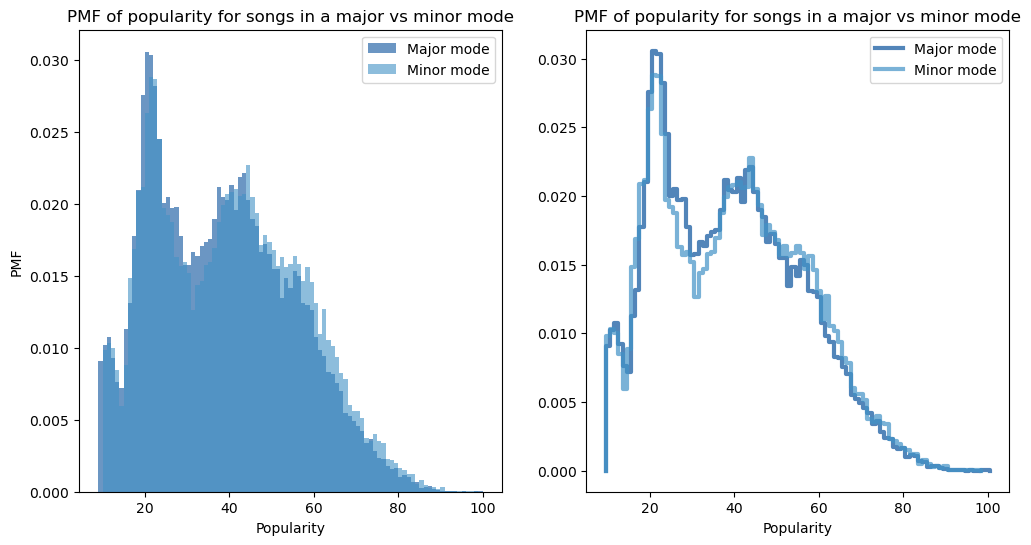

In [13]:
major_key = df[df.mmode == 1]
minor_key = df[df.mmode == 0]
pmf = thinkstats2.Pmf(major_key.popularity, label='Major mode')
pmf2 = thinkstats2.Pmf(minor_key.popularity, label='Minor mode')
width = 1
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(pmf, align="right", width=width)
thinkplot.Hist(pmf2, align="left", width=width)
thinkplot.Config(xlabel="Popularity", ylabel="PMF", title="PMF of popularity for songs in a major vs minor mode")

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([pmf, pmf2], width=1)
thinkplot.Config(xlabel="Popularity", title="PMF of popularity for songs in a major vs minor mode")

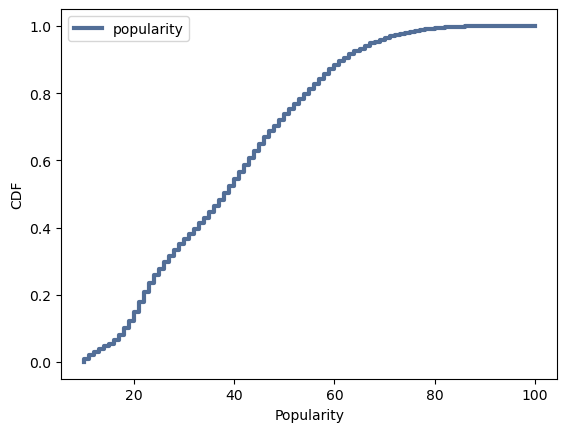

In [14]:
cdf = thinkstats2.Cdf(df.popularity, label='popularity')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Popularity', ylabel='CDF', loc='upper left')

n, mean, std 75875 38.84868005217929 16.106043470197566


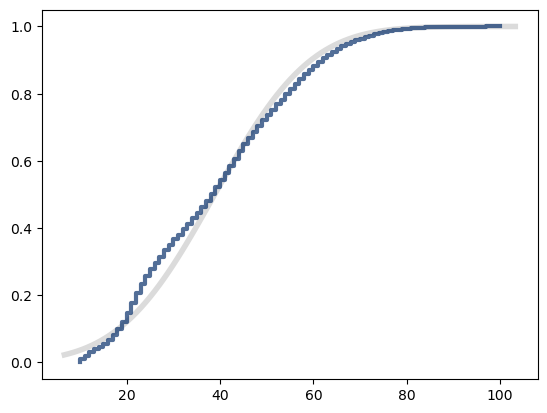

In [15]:
def MakeNormalModel(weights):
    """Plots a CDF with a Normal model.

    weights: sequence
    """
    cdf = thinkstats2.Cdf(weights, label="popularity")

    mean, var = thinkstats2.TrimmedMeanVar(weights)
    std = np.sqrt(var)
    print("n, mean, std", len(weights), mean, std)

    xmin = mean - 2 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label="model", linewidth=4, color="0.8")
    thinkplot.Cdf(cdf)

MakeNormalModel(df.popularity)


n, mean, std 75875 1.547430075136007 0.19861789913182934


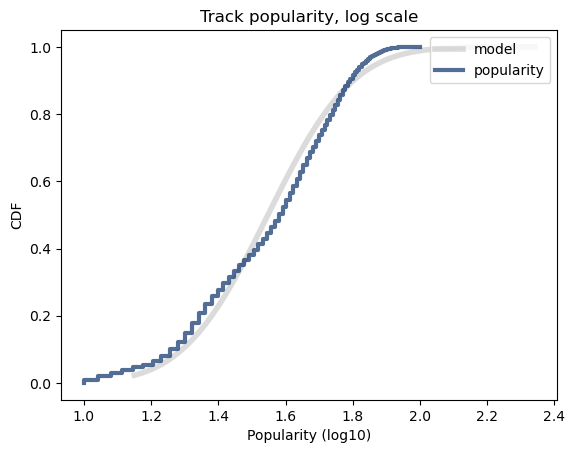

In [16]:
log_popularity = np.log10(df.popularity)
MakeNormalModel(log_popularity)
thinkplot.Config(
    title="Track popularity, log scale",
    xlabel="Popularity (log10)",
    ylabel="CDF",
    loc="upper right",
)

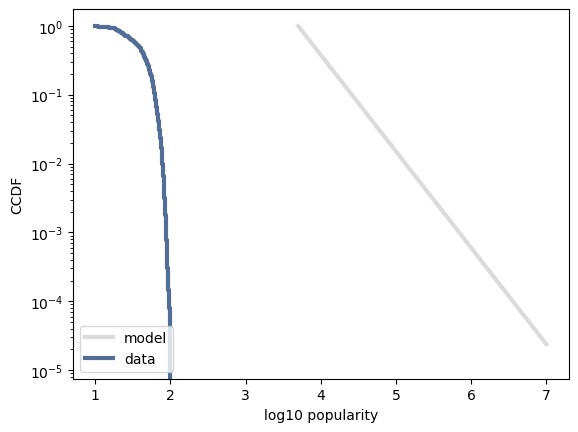

In [17]:
log_pops = np.log10(df.popularity)
cdf = thinkstats2.Cdf(df.popularity, label="data")
cdf_log = thinkstats2.Cdf(log_pops, label="data")

# pareto plot
xs, ys = thinkstats2.RenderParetoCdf(xmin=5000, alpha=1.4, low=0, high=1e7)
thinkplot.Plot(np.log10(xs), 1 - ys, label="model", color="0.8")

thinkplot.Cdf(cdf_log, complement=True)
thinkplot.Config(
    xlabel="log10 popularity", ylabel="CCDF", yscale="log", loc="lower left"
)

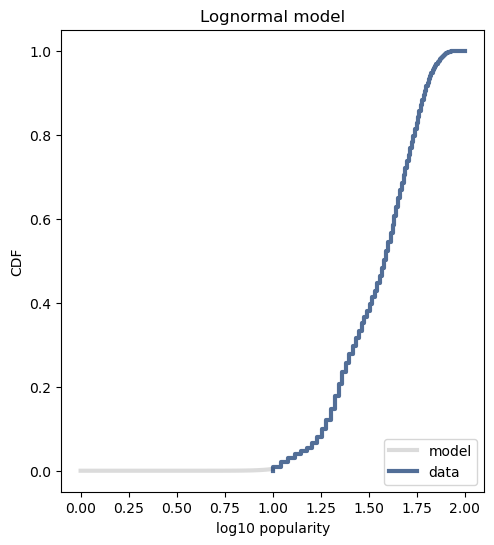

In [18]:
thinkplot.PrePlot(cols=2)

mu, sigma = log_pops.mean(), log_pops.std()
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=1)
thinkplot.Plot(xs, ps, label="model", color="0.8")

thinkplot.Cdf(cdf_log)
thinkplot.Config(xlabel="log10 popularity", ylabel="CDF", title="Lognormal model", loc="lower right")

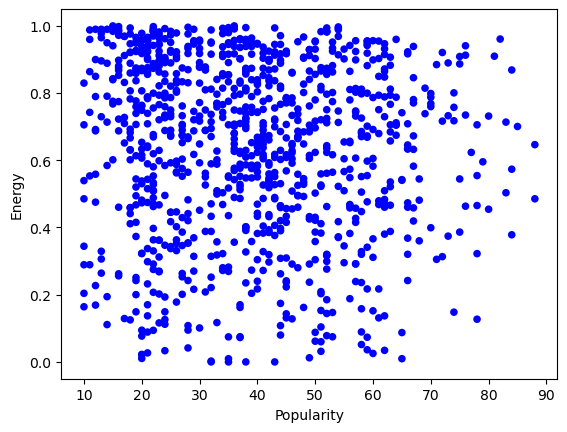

In [19]:
def SampleRows(df, nrows, replace=False):
    indices = np.random.choice(df.index, nrows, replace=replace)
    sample = df.loc[indices]
    return sample

sample = SampleRows(df, 1000)
thinkplot.Scatter(sample.popularity, sample.energy, alpha=1)
thinkplot.Config(xlabel='Popularity',
                 ylabel='Energy',
                 legend=False)

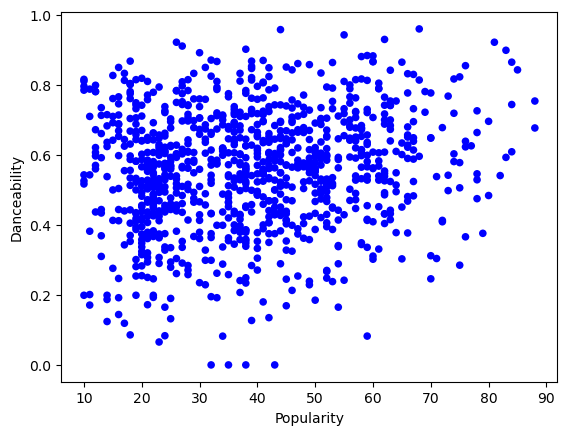

In [20]:
thinkplot.Scatter(sample.popularity, sample.danceability, alpha=1)
thinkplot.Config(xlabel='Popularity',
                 ylabel='Danceability',
                 legend=False)

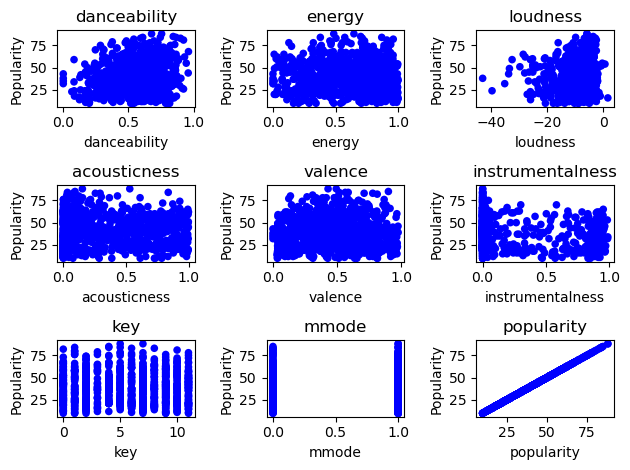

In [21]:
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    thinkplot.Scatter(sample[feature], sample.popularity, alpha=1 )
    plt.title(f'{feature}')
    plt.xlabel(feature)
    plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

In [22]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

for feature in features:
    print(f'Correlation between {feature} and popularity: {Corr(df[feature], df.popularity)}')

Correlation between danceability and popularity: 0.1198779474897449
Correlation between energy and popularity: -0.05196339751893727
Correlation between loudness and popularity: 0.06050469500286372
Correlation between acousticness and popularity: -0.02042069320064255
Correlation between valence and popularity: 0.005644477360249906
Correlation between instrumentalness and popularity: -0.1797938830819091
Correlation between key and popularity: 0.008186558498638835
Correlation between mmode and popularity: -0.02402480863461855
Correlation between popularity and popularity: 1.0


In [23]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

for feature in features:
    print(f'Spearman Correlation between {feature} and popularity: {SpearmanCorr(df[feature], df.popularity)}')

Spearman Correlation between danceability and popularity: 0.10942722123269469
Spearman Correlation between energy and popularity: -0.087530025648837
Spearman Correlation between loudness and popularity: 0.06663482983775926
Spearman Correlation between acousticness and popularity: 0.05303485313716811
Spearman Correlation between valence and popularity: 0.005423726587253576
Spearman Correlation between instrumentalness and popularity: -0.1884980547777994
Spearman Correlation between key and popularity: 0.008123680761793314
Spearman Correlation between mmode and popularity: -0.021904647934660744
Spearman Correlation between popularity and popularity: 1.0


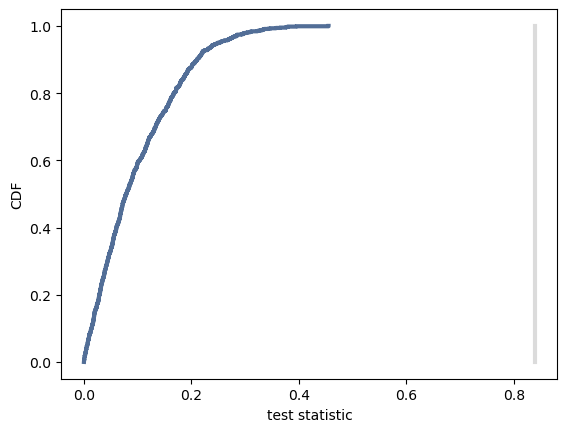

In [24]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
    
data = major_key.popularity.values, minor_key.popularity.values
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue
ht.PlotCdf()
thinkplot.Config(xlabel='test statistic',
                   ylabel='CDF')

In [25]:
class DiffMeansOneSided(DiffMeansPermute):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.mean() - group2.mean()
        return test_stat
    
ht = DiffMeansOneSided(data)
pvalue = ht.PValue()
pvalue

1.0

In [26]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

cleaned = df.dropna(subset=['popularity', 'danceability'])
data = cleaned.danceability.values, cleaned.popularity.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

Chi-square test of popularity vs mode

In [27]:
class PopularityTest(thinkstats2.HypothesisTest):

    def MakeModel(self):
        firsts, others = self.data
        self.n = len(firsts)
        self.pool = np.hstack((firsts, others))

        pmf = thinkstats2.Pmf(self.pool)
        self.values = range(35, 44)
        self.expected_probs = np.array(pmf.Probs(self.values))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
    
    def TestStatistic(self, data):
        firsts, others = data
        stat = self.ChiSquared(firsts) + self.ChiSquared(others)
        return stat

    def ChiSquared(self, lengths):
        hist = thinkstats2.Hist(lengths)
        observed = np.array(hist.Freqs(self.values))
        expected = self.expected_probs * len(lengths)
        stat = sum((observed - expected)**2 / expected)
        return stat
    
data = major_key.popularity.values, minor_key.popularity.values
ht = PopularityTest(data)
p_value = ht.PValue()
print('p-value =', p_value)
print('actual =', ht.actual)
print('ts max =', ht.MaxTestStat())

p-value = 0.703
actual = 6.2109416340612205
ts max = 26.222031667252708


In [28]:
model = smf.ols('popularity ~ danceability + energy + instrumentalness + loudness', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     1029.
Date:                Sat, 16 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:18:53   Log-Likelihood:            -3.1968e+05
No. Observations:               75875   AIC:                         6.394e+05
Df Residuals:                   75870   BIC:                         6.394e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           45.5067      0.456     99.800      0.000      44.613      46.400
danceability         7.9655      0.356     22.386      0.000       7.268       8.663
energy             -10.7088      0.370    -28.933      0.000     -11.434      -9.983
instrumentalness    -7.8939      0.211    -37.396      0.000      -8.308      -7.480
loudness             0.3265      0.020     16.126      0.000       0.287       0.366
==============================================================================
Omnibus:                     4380.206   Durbin-Watson:                   0.534
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2744.789
Skew:                           0.338   Prob(JB):                         0.00
Kurtosis:                       2.359   Cond. No.                         98.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
df['major_key'] = df.mmode == 1
df['minor_key'] = df.mmode == 0
model = smf.ols('popularity ~ minor_key', data=df)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     43.82
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           3.63e-11
Time:                        14:18:53   Log-Likelihood:            -3.2166e+05
No. Observations:               75875   AIC:                         6.433e+05
Df Residuals:                   75873   BIC:                         6.433e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            38.6955      0.076    507.111      0.000      38.546      38.845
minor_key[T.True]     0.8391      0.127      6.620      0.000       0.591       1.088
==============================================================================
Omnibus:                     4775.116   Durbin-Watson:                   0.469
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2830.442
Skew:                           0.335   Prob(JB):                         0.00
Kurtosis:                       2.333   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""